**Programming assignment 2**

**KASHISH VERMA 220508**


**Q) Verify that the mean of power is centered around the variance of the voltage**


For a voltage signal $V$ with zero mean ($E[V] = 0$), the variance is defined as:
$$\sigma_V^2 = E[V^2] - (E[V])^2$$

instantaneous power $P$ across a unit resistance ($1\Omega$) is given by:
$$P = V^2$$

The **"center"** or expected value of the power is:
$$E[P] = E[V^2]$$

Since $E[V] = 0$, the variance formula simplifies to $\sigma_V^2 = E[V^2]$. Substituting this into the power equation, we get:
$$E[P] = \sigma_V^2$$

This proves that the distribution of power is mathematically **centered** (in terms of its first moment or mean) exactly at the value of the voltage variance.

In [ ]:
import numpy as np

# Simulate Gaussian Voltage
sigma_v = 3.0
v = np.random.normal(0, sigma_v, 100000)
p = v**2

print(f"Voltage Variance (sigma^2): {np.var(v):.4f}")
print(f"Mean of Power: {np.mean(p):.4f}")
# These two values will be nearly identical.

Voltage Variance (sigma^2): 8.9640
Mean of Power: 8.9643


 Code Explaination
* Generating a dataset of 100,000 samples representing a Gaussian voltage signal $V$ with a mean $\mu = 0$ and standard deviation $\sigma = 3.0$.
* Calculating the instantaneous power $P$ by squaring the voltage samples ($P = V^2$), which transforms the data from a **Gaussian** distribution to a **Chi-squared** distribution.

* Using `np.var(v)` to compute the statistical variance of the voltage, representing the spread of the fluctuations around the zero mean.
* Using`np.mean(p)` to find the average power, which represents the first moment (the "center") of the power distribution.
* Comparing the two numerical results to verify the identity $E[P] = \sigma_V^2$, proving that for zero-mean signals, the average power is identically equal to the voltage variance.

**Q)Consider cases of different RMS and plot their histograms.**


The **Root Mean Square (RMS)** of a zero-mean signal is equivalent to its standard deviation $\sigma_V$.

When we square a Gaussian random variable $V \sim N(0, \sigma^2)$, the resulting power $P = V^2$ follows a **Chi-squared distribution** with 1 degree of freedom ($\chi^2_1$).
* **Low RMS:** The voltage distribution is narrow, causing power to cluster sharply near $0$.
* **High RMS:** The voltage distribution is wide, leading to a "heavy-tailed" power histogram.

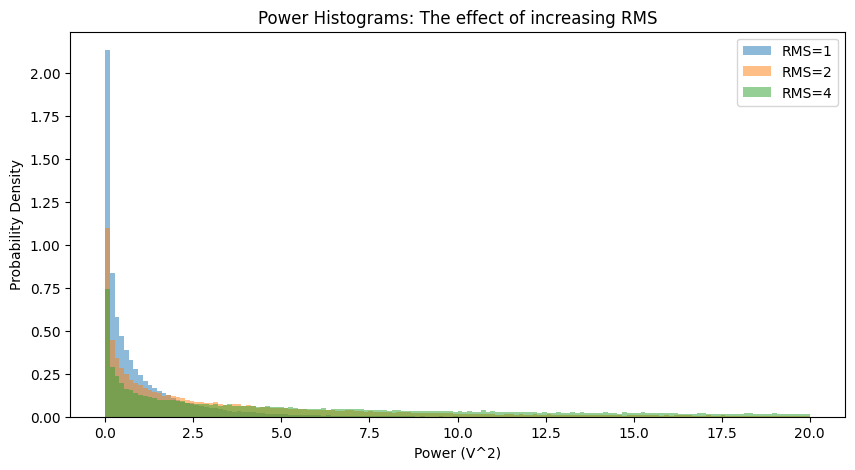

In [ ]:
import matplotlib.pyplot as plt

rms_vals = [1, 2, 4]
plt.figure(figsize=(10, 5))

for rms in rms_vals:
    v = np.random.normal(0, rms, 50000)
    p = v**2
    plt.hist(p, bins=150, range=(0, 20), alpha=0.5, density=True, label=f'RMS={rms}')

plt.title("Power Histograms: The effect of increasing RMS")
plt.xlabel("Power (V^2)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

* Initializing a list of **RMS** values ($1, 2, 4$) and looping through each RMS value to generate 50,000 Gaussian voltage samples where the standard deviation $\sigma$ is set equal to the **RMS**.
* Computing the instantaneous power $P = V^2$ for each case, which results in a **Chi-squared** distribution with one degree of freedom ($\chi^2_1$).

* Utilizing `plt.hist()` with the `density=True` parameter to normalize the histograms, allowing for a direct comparison of probability densities across different scales.
* Set the `range=(0, 20)` to focus on the behavior of the "tails," showing that higher RMS values significantly increase the probability of high-power peaks.


**Q)How will the histogram change if I add a slowly varying sine wave in it.**


When a slowly varying sine wave $S(t) = A\sin(\omega t)$ is added, the total voltage becomes $V_{total} = V_{noise} + S(t)$.

The histogram changes from a **Central Chi-squared** to a **Non-central Chi-squared distribution**.
* The peak at zero power "smears" or flattens because the sine wave shifts the mean of the Gaussian noise back and forth.
* The power distribution becomes broader as it accounts for both the noise variance and the power of the sine wave ($A^2/2$).

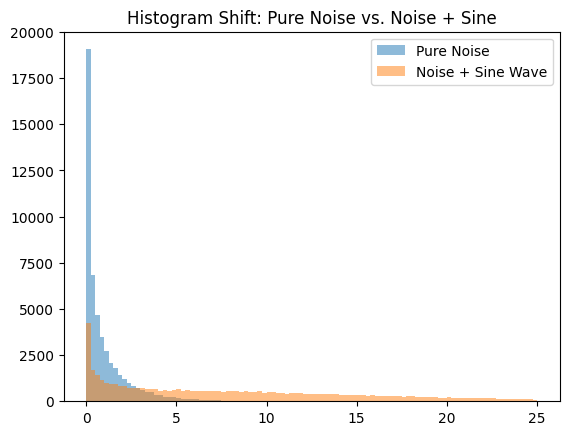

In [ ]:
t = np.linspace(0, 10, 50000)
noise = np.random.normal(0, 1, 50000)
sine = 4 * np.sin(2 * np.pi * 0.5 * t) # Slowly varying component
v_total = noise + sine

plt.hist(noise**2, bins=100, range=(0, 25), alpha=0.5, label='Pure Noise')
plt.hist(v_total**2, bins=100, range=(0, 25), alpha=0.5, label='Noise + Sine Wave')
plt.title("Histogram Shift: Pure Noise vs. Noise + Sine")
plt.legend()
plt.show()

* Create a time vector `t` and generate a **slowly varying sine wave** with an amplitude of $4$ and a frequency of $0.5 \text{ Hz}$ to serve as a non-stationary signal component.
* Generate pure Gaussian noise with $\mu = 0$ and $\sigma = 1$, then add it to the sine wave to create a composite voltage signal $V_{total}$.
* The "spike" at zero power disappears and the distribution "smears" or broadens significantly, as the power now fluctuates around the oscillating mean provided by the sine wave.

**Q)How are the Variances of the ensembles distributed ?**


An ensemble variance is the variance calculated from a finite sample of the signal. If we take many such samples (ensembles), the variances themselves form a distribution.

For Gaussian noise, the sample variance $s^2$ follows a **Gamma distribution**. According to the **Central Limit Theorem**, as the number of samples in each ensemble ($n$) increases:
1. The distribution narrows around the true population variance $\sigma^2$.
2. The shape of the distribution approaches a **Gaussian (Normal) distribution**.

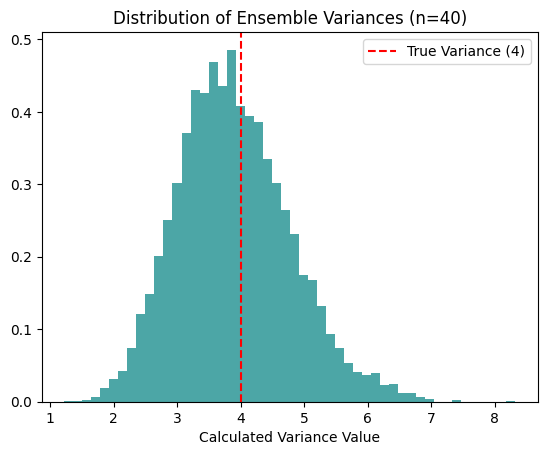

In [ ]:
# Parameters
true_sigma = 2
pop_variance = true_sigma**2
n_ensembles = 5000
samples_per_ensemble = 40

# Calculate variance for each ensemble
ens_vars = [np.var(np.random.normal(0, true_sigma, samples_per_ensemble)) for _ in range(n_ensembles)]

plt.hist(ens_vars, bins=50, color='teal', alpha=0.7, density=True)
plt.axvline(pop_variance, color='red', linestyle='--', label=f'True Variance ({pop_variance})')
plt.title(f"Distribution of Ensemble Variances (n={samples_per_ensemble})")
plt.xlabel("Calculated Variance Value")
plt.legend()
plt.show()

* Define the population parameters with a true standard deviation $\sigma = 2$, resulting in a target population variance $\sigma^2 = 4$.
* Configure the simulation to run 5,000 separate **ensembles**, with each ensemble containing 40 individual samples to observe the statistical behavior of the sample variance.
* Use a list comprehension to generate Gaussian noise for each ensemble and calculate the specific sample variance $s^2$ using `np.var()`.
* Store these 5,000 calculated variances to form a **sampling distribution**, which reveals how the variance estimate fluctuates due to finite sample size.
* As the number of samples per ensemble ($n$) increases, the distribution would become narrower and more symmetric, eventually approaching a **Gaussian** shape.